Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

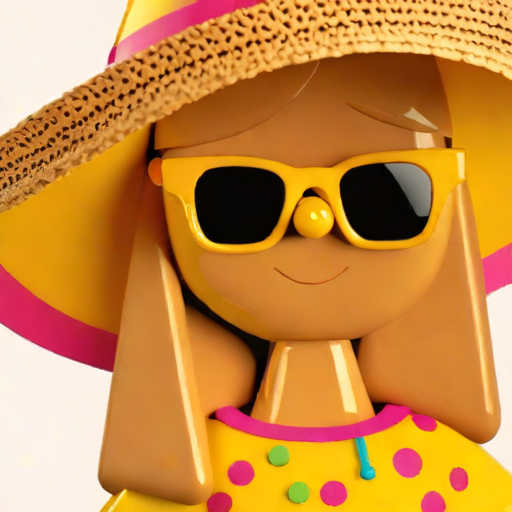

In [1]:
from diffusers import DiffusionPipeline
import torch

pipe_id = "stabilityai/sdxl-turbo"
pipe = DiffusionPipeline.from_pretrained(pipe_id, torch_dtype=torch.float16).to("cuda")

pipe.load_lora_weights("CiroN2022/toy-face", weight_name="toy_face_sdxl.safetensors", adapter_name="toy")

prompt = "toy_face of a cute girl with a sunhat and sunglasses"

lora_scale = 0.9
image = pipe(
    prompt, num_inference_steps=30, cross_attention_kwargs={"scale": lora_scale}, generator=torch.manual_seed(0)
).images[0]
image

  0%|          | 0/30 [00:00<?, ?it/s]

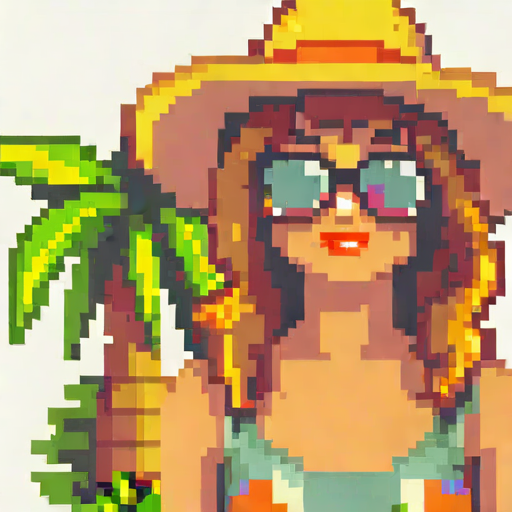

In [3]:
# from peft import enable_peft_backend
# enable_peft_backend()
#The pipeline automatically sets the first loaded adapter ("toy") as the active adapter,
# but you can activate the "pixel" adapter with the set_adapters() method:
pipe.load_lora_weights("nerijs/pixel-art-xl", weight_name="pixel-art-xl.safetensors", adapter_name="pixel")
pipe.set_adapters("pixel")

#Make sure you include the token pixel art in your prompt to generate a pixel art image
prompt = "a cute girl with a sunhat and sunglasses, pixel art"
image = pipe(
    prompt, num_inference_steps=30, cross_attention_kwargs={"scale": lora_scale}, generator=torch.manual_seed(0)
).images[0]
image

  0%|          | 0/30 [00:00<?, ?it/s]

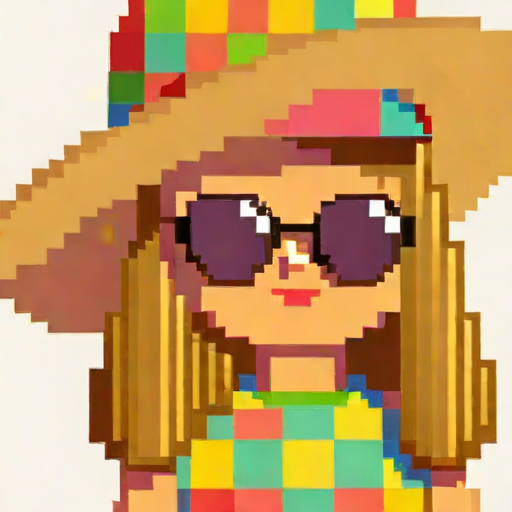

In [4]:
#merge different adapter checkpoints for inference to blend their styles together

#use the set_adapters() method to activate the pixel and toy adapters
# and specify the weights for how they should be merged

pipe.set_adapters(["pixel", "toy"], adapter_weights=[0.5, 1.0])

#Remember to use the trigger words for CiroN2022/toy-face and nerijs/pixel-art-xl
# (these are found in their repositories) in the prompt to generate an image

prompt = "toy_face a cute girl with a sunhat and sunglasses, pixel art"
image = pipe(
    prompt, num_inference_steps=30, cross_attention_kwargs={"scale": 1.0}, generator=torch.manual_seed(0)
).images[0]
image

  0%|          | 0/30 [00:00<?, ?it/s]

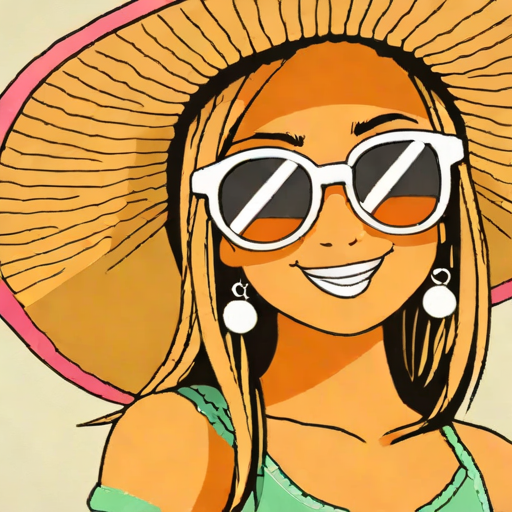

In [5]:
#disable all adapters and return the base model
pipe.disable_lora()

prompt = "toy_face of a cute girl with a sunhat and sunglasses"
image = pipe(prompt, num_inference_steps=30, generator=torch.manual_seed(0)).images[0]
image
